In [1]:
import numpy as np 
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('drive/MyDrive/Colab Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
avg_temp = pd.read_csv('drive/MyDrive/Colab Data/daily_temp.csv', encoding='cp949')
avg_temp

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013/01/01,-4.7,0.0,-8.7,8.7
1,2013/01/02,-11.7,-4.8,-15.1,10.3
2,2013/01/03,-13.2,-9.3,-16.4,7.1
3,2013/01/04,-10.7,-5.8,-14.8,9.0
4,2013/01/05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2551,2019/12/27,-1.7,2.6,-4.6,7.2
2552,2019/12/28,1.1,6.1,-3.6,9.7
2553,2019/12/29,3.8,6.2,1.1,5.1
2554,2019/12/30,2.7,6.8,-5.7,12.5


In [4]:
avg_temp['date'] = pd.to_datetime(avg_temp['date'])
avg_temp

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.7,0.0,-8.7,8.7
1,2013-01-02,-11.7,-4.8,-15.1,10.3
2,2013-01-03,-13.2,-9.3,-16.4,7.1
3,2013-01-04,-10.7,-5.8,-14.8,9.0
4,2013-01-05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2551,2019-12-27,-1.7,2.6,-4.6,7.2
2552,2019-12-28,1.1,6.1,-3.6,9.7
2553,2019-12-29,3.8,6.2,1.1,5.1
2554,2019-12-30,2.7,6.8,-5.7,12.5


In [5]:
avg_temp.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
1168,2016-03-14,4.7,9.6,1.3,8.3
2497,2019-11-03,14.7,22.1,9.4,12.7


In [6]:
temp_tmp = avg_temp

In [7]:
avg_temp['date'].dt.month.value_counts()

7     217
5     217
3     217
1     217
12    217
10    217
8     217
11    210
9     210
6     210
4     210
2     197
Name: date, dtype: int64

In [8]:
avg_temp.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
536,2014-06-21,23.1,28.2,19.8,8.4
49,2013-02-19,-2.9,0.6,-7.1,7.7


In [9]:
len(avg_temp[avg_temp['date'].dt.year != 2019])

2191

In [10]:
temp_train = avg_temp.iloc[:len(avg_temp[avg_temp['date'].dt.year != 2019])]
temp_test = avg_temp.iloc[len(avg_temp[avg_temp['date'].dt.year != 2019]):]

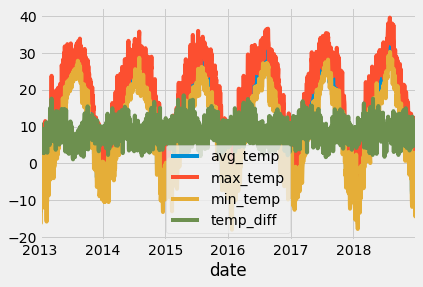

In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
temp_train.set_index('date').plot()

In [12]:
temp_train

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.7,0.0,-8.7,8.7
1,2013-01-02,-11.7,-4.8,-15.1,10.3
2,2013-01-03,-13.2,-9.3,-16.4,7.1
3,2013-01-04,-10.7,-5.8,-14.8,9.0
4,2013-01-05,-7.0,-1.2,-12.1,10.9
...,...,...,...,...,...
2186,2018-12-27,-10.1,-6.5,-12.5,6.0
2187,2018-12-28,-10.5,-6.6,-14.4,7.8
2188,2018-12-29,-7.6,-3.0,-10.5,7.5
2189,2018-12-30,-6.8,-0.9,-11.3,10.4


In [13]:
temp_train_prophet = temp_train.copy()
temp_train_prophet.sample(2)

,date,avg_temp,max_temp,min_temp,temp_diff
768,2015-02-08,-9.8,-2.8,-11.9,9.1
53,2013-02-23,-0.9,2.4,-4.4,6.8


In [14]:
temp_train_prophet.columns = ['ds', 'y1', 'y2','y3','y4']

In [15]:
timeseries1 = temp_train_prophet.loc[:, ['ds', 'y1']]
timeseries2 = temp_train_prophet.loc[:, ['ds', 'y2']]
timeseries3 = temp_train_prophet.loc[:, ['ds', 'y3']]
timeseries4 = temp_train_prophet.loc[:, ['ds', 'y4']]
timeseries1.columns= ['ds','y']
timeseries2.columns= ['ds','y']
timeseries3.columns= ['ds','y']
timeseries4.columns= ['ds','y']

In [16]:
!pip install neuralprophet

     |████████████████████████████████| 67 kB 2.8 MB/s 
     |████████████████████████████████| 155 kB 41.2 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [60]:
# 상한, 하한 설정 해야하나 ..? 
from neuralprophet import NeuralProphet
model1 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics1 = model1.fit(timeseries1, freq='d',
                    plot_live_loss=True, epochs=100)

model2 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics2 = model2.fit(timeseries2, freq='d',
                    plot_live_loss=True, epochs=100)

model3 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics3 = model3.fit(timeseries3, freq='d',
                    plot_live_loss=True, epochs=100)

model4 = NeuralProphet(
    growth="linear", 
    changepoints=None, 
    n_changepoints=5,
    changepoints_range=0.8,
    trend_reg=0,
    trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    seasonality_mode="additive",
    seasonality_reg=0,
    n_forecasts=1,
    n_lags=0,
    num_hidden_layers=0,
    d_hidden=None,     
    ar_sparsity=None,  
    learning_rate=None,
    epochs=40,
    loss_func="Huber",
    normalize="auto",  
    impute_missing=True,
)
metrics4 = model4.fit(timeseries4, freq='d',
                    plot_live_loss=True, epochs=100)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 9.33E-01


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 8.63E-01


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 1.27E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 5.36E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.92it/s, SmoothL1Loss=0.00252, MAE=2.33, RMSE=3.01, RegLoss=0]
INFO - (NP.forecaster._handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_au

  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 1.38E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.14E-02, min: 1.27E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.47E-02, min: 1.38E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 4.47E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.79it/s, SmoothL1Loss=0.00326, MAE=2.74, RMSE=3.46, RegLoss=0]
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.44E-01, min: 1.49E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.55E-01, min: 1.27E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.68E-01, min: 1.61E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 1.55E-01
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.88it/s, SmoothL1Loss=0.00275, MAE=2.42, RMSE=3.14, RegLoss=0]
INFO - (NP.forecaster._handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_au

  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 1.38E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.71E-02, min: 1.74E+00


  0%|          | 0/267 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 7.13E-02, min: 2.03E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.52E-02
  0%|          | 0/100 [00:00<?, ?it/s]WARNING - (NP.forecaster._train) - To plot live loss, please install neuralprophet[live].Using pip: 'pip install neuralprophet[live]'Or install the missing package manually: 'pip install livelossplot'
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/neuralprophet/forecaster.py", line 676, in _train
    from livelossplot import PlotLosses
ModuleNotFoundError: No module named 'livelossplot'
Epoch[100/100]: 100%|██████████| 100/100 [00:12<00:00,  7.85it/s, SmoothL1Loss=0.0214, MAE=2.1, RMSE=2.62, RegLoss=0]


In [18]:
future_dates1 = model1.make_future_dataframe(timeseries1, periods=(90))
future_dates2 = model2.make_future_dataframe(timeseries2, periods=(90))
future_dates3 = model3.make_future_dataframe(timeseries3, periods=(90))
future_dates4 = model4.make_future_dataframe(timeseries4, periods=(90))

In [19]:
result1 = model1.predict(future_dates1)
result2 = model2.predict(future_dates2)
result3 = model3.predict(future_dates3)
result4 = model4.predict(future_dates4)


Text(0.5, 1.0, 'Temperature difference in Seoul')

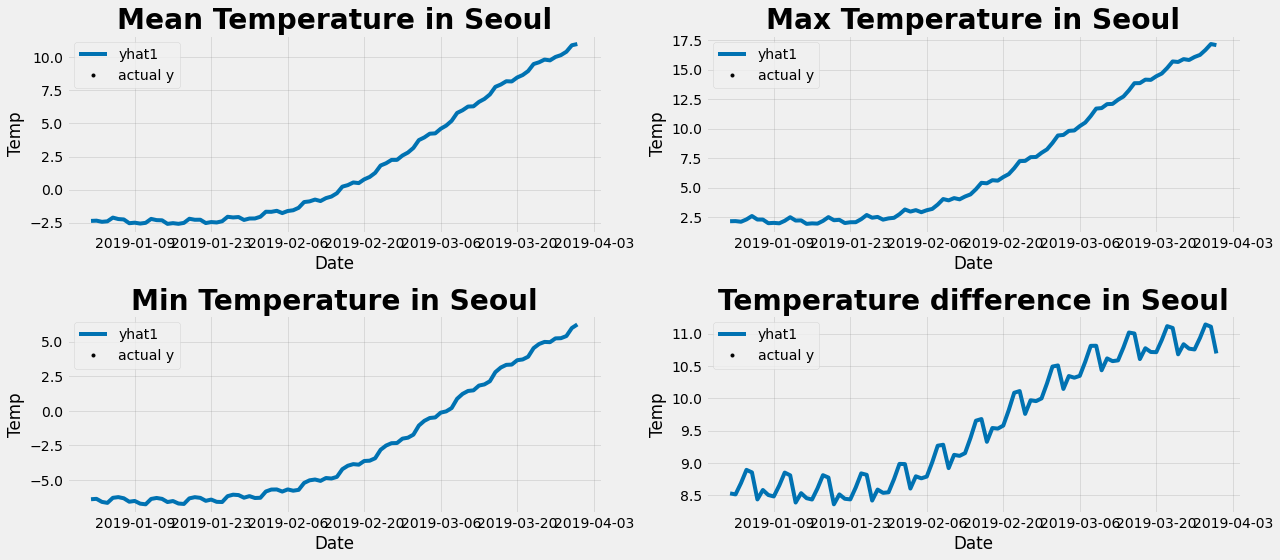

In [76]:
figure, [[ax1,ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,8)
model1.plot(result1, xlabel="Date", ylabel="Temp", ax=ax1)
ax1.set_title("Mean Temperature in Seoul", fontsize=28, fontweight="bold")
model2.plot(result2, xlabel="Date", ylabel="Temp", ax=ax2)
ax2.set_title("Max Temperature in Seoul", fontsize=28, fontweight="bold")
model3.plot(result3, xlabel="Date", ylabel="Temp", ax=ax3)
ax3.set_title("Min Temperature in Seoul", fontsize=28, fontweight="bold")
model4.plot(result4, xlabel="Date", ylabel="Temp", ax=ax4)
ax4.set_title("Temperature difference in Seoul", fontsize=28, fontweight="bold")

In [21]:
temp_test = temp_test.iloc[:90]
temp_test

,date,avg_temp,max_temp,min_temp,temp_diff
2191,2019-01-01,-5.0,-0.6,-8.2,7.6
2192,2019-01-02,-4.9,0.2,-8.8,9.0
2193,2019-01-03,-3.5,3.2,-8.4,11.6
2194,2019-01-04,-1.1,4.1,-6.2,10.3
2195,2019-01-05,-2.8,1.1,-5.5,6.6
...,...,...,...,...,...
2276,2019-03-27,11.6,16.2,8.9,7.3
2277,2019-03-28,9.4,14.6,5.6,9.0
2278,2019-03-29,9.2,15.1,5.5,9.6
2279,2019-03-30,5.2,8.4,3.5,4.9


In [22]:
result1['yhat1'].describe()

count    90.000000
mean      1.729495
std       4.507670
min      -2.581765
25%      -2.215609
50%      -0.394778
75%       5.639476
max      10.987550
Name: yhat1, dtype: float64

In [23]:
result3

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2019-01-01,None,-6.391476,None,9.134935,-15.448582,-0.077830
1,2019-01-02,None,-6.363056,None,9.136555,-15.488216,-0.011395
2,2019-01-03,None,-6.584007,None,9.138174,-15.523254,-0.198926
3,2019-01-04,None,-6.654570,None,9.139793,-15.553966,-0.240399
4,2019-01-05,None,-6.288513,None,9.141413,-15.580620,0.150694
...,...,...,...,...,...,...,...
85,2019-03-27,None,5.248589,None,9.272568,-4.012586,-0.011395
86,2019-03-28,None,5.262800,None,9.274187,-3.812459,-0.198926
87,2019-03-29,None,5.417236,None,9.275806,-3.618171,-0.240399
88,2019-03-30,None,5.998573,None,9.277424,-3.429544,0.150694


In [24]:
temp_test.reset_index()

,index,date,avg_temp,max_temp,min_temp,temp_diff
0,2191,2019-01-01,-5.0,-0.6,-8.2,7.6
1,2192,2019-01-02,-4.9,0.2,-8.8,9.0
2,2193,2019-01-03,-3.5,3.2,-8.4,11.6
3,2194,2019-01-04,-1.1,4.1,-6.2,10.3
4,2195,2019-01-05,-2.8,1.1,-5.5,6.6
...,...,...,...,...,...,...
85,2276,2019-03-27,11.6,16.2,8.9,7.3
86,2277,2019-03-28,9.4,14.6,5.6,9.0
87,2278,2019-03-29,9.2,15.1,5.5,9.6
88,2279,2019-03-30,5.2,8.4,3.5,4.9


In [25]:
display(result1['yhat1'], temp_test['avg_temp'])

0     -2.358759
1     -2.339763
2     -2.426610
3     -2.388978
4     -2.109587
        ...    
85    10.010671
86    10.150887
87    10.406465
88    10.895225
89    10.987550
Name: yhat1, Length: 90, dtype: float64

2191    -5.0
2192    -4.9
2193    -3.5
2194    -1.1
2195    -2.8
        ... 
2276    11.6
2277     9.4
2278     9.2
2279     5.2
2280     4.4
Name: avg_temp, Length: 90, dtype: float64

In [26]:
date = temp_test.iloc[:90, :]

In [27]:
date['avg_temp'] = result1['yhat1'].values
date['max_temp'] = result2['yhat1'].values
date['min_temp'] = result3['yhat1'].values
date['temp_diff'] = result4['yhat1'].values

In [28]:
temp_test.info()
date 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 2191 to 2280
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       90 non-null     datetime64[ns]
 1   avg_temp   90 non-null     float64       
 2   max_temp   90 non-null     float64       
 3   min_temp   90 non-null     float64       
 4   temp_diff  90 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.6 KB


,date,avg_temp,max_temp,min_temp,temp_diff
2191,2019-01-01,-2.358759,2.151119,-6.391476,8.528342
2192,2019-01-02,-2.339763,2.161036,-6.363056,8.512851
2193,2019-01-03,-2.426610,2.107072,-6.584007,8.688238
2194,2019-01-04,-2.388978,2.304739,-6.654570,8.892112
2195,2019-01-05,-2.109587,2.592747,-6.288513,8.853278
...,...,...,...,...,...
2276,2019-03-27,10.010671,16.068996,5.248589,10.753434
2277,2019-03-28,10.150887,16.247265,5.262800,10.932056
2278,2019-03-29,10.406465,16.667400,5.417236,11.139721
2279,2019-03-30,10.895225,17.168671,5.998573,11.105278


In [29]:
temp_train = temp_train.drop(columns=['temp_diff'])

In [30]:
temp_predict = pd.concat([temp_train, date], ignore_index=True)
temp_predict

,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,-4.700000,0.000000,-8.700000,8.700000
1,2013-01-02,-11.700000,-4.800000,-15.100000,10.300000
2,2013-01-03,-13.200000,-9.300000,-16.400000,7.100000
3,2013-01-04,-10.700000,-5.800000,-14.800000,9.000000
4,2013-01-05,-7.000000,-1.200000,-12.100000,10.900000
...,...,...,...,...,...
2276,2019-03-27,10.010671,16.068996,5.248589,10.753434
2277,2019-03-28,10.150887,16.247265,5.262800,10.932056
2278,2019-03-29,10.406465,16.667400,5.417236,11.139721
2279,2019-03-30,10.895225,17.168671,5.998573,11.105278


### 본 데이터 가져오기

In [31]:
train = pd.read_csv('drive/MyDrive/Colab Data/한국가스공사_시간별 공급량_20181231 (1).csv', encoding="cp949")
train 

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [32]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    return out
outlier_list= iqr_outliers(train['공급량'])

In [33]:
train = train[~ train['공급량'].isin(outlier_list)]
train

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
...,...,...,...,...
368083,2018-12-31,20,H,681.033
368084,2018-12-31,21,H,669.961
368085,2018-12-31,22,H,657.941
368086,2018-12-31,23,H,610.953


In [34]:
test= pd.read_csv('drive/MyDrive/Colab Data/test.csv')
test['연월일'] = test['일자|시간|구분'].apply(lambda x : x.split()[0])
test['시간'] = test['일자|시간|구분'].apply(lambda x : x.split()[1])
test['구분'] = test['일자|시간|구분'].apply(lambda x : x.split()[2])
test = test.drop(columns=['일자|시간|구분'])

In [35]:
len(test)

15120

In [36]:
all_data = pd.concat([train, test])
all_data.head(50)

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105
5,2013-01-01,6,A,2390.961
6,2013-01-01,7,A,2378.457
7,2013-01-01,8,A,2518.921
8,2013-01-01,9,A,2706.481
9,2013-01-01,10,A,2832.057


In [37]:
all_data['시간'] = all_data['시간'].astype(int)

In [38]:
temp_predict['date'] = pd.to_datetime(temp_predict['date'])

In [39]:
all_data['연월일'] = pd.to_datetime(all_data['연월일'])

In [40]:
all_data_test = all_data.merge(temp_predict , right_on=['date'], left_on=['연월일'], how='left')

In [41]:
all_data_test.head(50)

,연월일,시간,구분,공급량,date,avg_temp,max_temp,min_temp,temp_diff
0,2013-01-01,1,A,2497.129,2013-01-01,-4.7,0.0,-8.7,8.7
1,2013-01-01,2,A,2363.265,2013-01-01,-4.7,0.0,-8.7,8.7
2,2013-01-01,3,A,2258.505,2013-01-01,-4.7,0.0,-8.7,8.7
3,2013-01-01,4,A,2243.969,2013-01-01,-4.7,0.0,-8.7,8.7
4,2013-01-01,5,A,2344.105,2013-01-01,-4.7,0.0,-8.7,8.7
5,2013-01-01,6,A,2390.961,2013-01-01,-4.7,0.0,-8.7,8.7
6,2013-01-01,7,A,2378.457,2013-01-01,-4.7,0.0,-8.7,8.7
7,2013-01-01,8,A,2518.921,2013-01-01,-4.7,0.0,-8.7,8.7
8,2013-01-01,9,A,2706.481,2013-01-01,-4.7,0.0,-8.7,8.7
9,2013-01-01,10,A,2832.057,2013-01-01,-4.7,0.0,-8.7,8.7


In [42]:
all_data_test = all_data_test.drop(columns=['연월일'])

Category 변수로 넣어보기

In [43]:
all_data_test['date'] = pd.to_datetime(all_data_test['date'])
all_data_test['month'] = all_data_test['date'].dt.month
all_data_test['day'] = all_data_test['date'].dt.day
all_data_test['weekday'] = all_data_test['date'].dt.weekday

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
c = all_data_test.columns[all_data_test.dtypes == object]
for i in c:
    all_data_test[i] = le.fit_transform(list(all_data_test[i]))

In [45]:
all_data_test2 = all_data_test.drop(columns=['date','공급량'])

In [46]:
all_data_test2.sample(2)

,시간,구분,avg_temp,max_temp,min_temp,temp_diff,month,day,weekday
265105,22,3,5.5,10.3,-1.9,12.2,2,16,3
5396,3,0,28.2,32.3,25.7,6.6,8,19,0


In [48]:
len(all_data_test)

370024

In [49]:
all_data_test = all_data_test.drop(columns=['date','temp_diff'])
all_data_test

,시간,구분,공급량,avg_temp,max_temp,min_temp,temp_diff,month,day,weekday
0,1,0,2497.129,-4.70000,0.000000,-8.700000,8.700000,1,1,1
1,2,0,2363.265,-4.70000,0.000000,-8.700000,8.700000,1,1,1
2,3,0,2258.505,-4.70000,0.000000,-8.700000,8.700000,1,1,1
3,4,0,2243.969,-4.70000,0.000000,-8.700000,8.700000,1,1,1
4,5,0,2344.105,-4.70000,0.000000,-8.700000,8.700000,1,1,1
...,...,...,...,...,...,...,...,...,...,...
370019,20,6,NaN,10.98755,17.075695,6.255354,10.692153,3,31,6
370020,21,6,NaN,10.98755,17.075695,6.255354,10.692153,3,31,6
370021,22,6,NaN,10.98755,17.075695,6.255354,10.692153,3,31,6
370022,23,6,NaN,10.98755,17.075695,6.255354,10.692153,3,31,6


In [50]:
train2 = all_data_test2[:len(train)]
test2 = all_data_test2[len(train):]

In [51]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.2 MB/s 


In [52]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=10, random_state=123, shuffle=True)
from catboost import CatBoostRegressor
cbc = CatBoostRegressor(iterations=10000) 
best_score_cbc_test = 0 
result_cbc_test = 0
scores_test = 0
for train_index, valid_index in kf.split(train2):
    x_train, x_valid = train2.iloc[train_index],train2.iloc[valid_index]
    y_train, y_valid = np.log(train['공급량'].iloc[train_index]),np.log(train['공급량'].iloc[valid_index])
    cbc.fit(x_train, y_train, eval_set=[(x_valid,y_valid)],verbose=1000,early_stopping_rounds=100)
    scores_test += cbc.score(x_valid, y_valid)/10
    best_score_cbc_test += cbc.best_score_['learn']['RMSE']/10
    result_cbc_test += np.exp(cbc.predict(test2))/10

Learning rate set to 0.030909
0:	learn: 1.1495396	test: 1.1457578	best: 1.1457578 (0)	total: 99.8ms	remaining: 16m 37s
1000:	learn: 0.2996573	test: 0.3055845	best: 0.3055845 (1000)	total: 41.4s	remaining: 6m 12s
2000:	learn: 0.2479243	test: 0.2546837	best: 0.2546837 (2000)	total: 1m 23s	remaining: 5m 32s
3000:	learn: 0.2081008	test: 0.2155768	best: 0.2155768 (3000)	total: 2m 4s	remaining: 4m 50s
4000:	learn: 0.1839661	test: 0.1913082	best: 0.1913082 (4000)	total: 2m 46s	remaining: 4m 9s
5000:	learn: 0.1684594	test: 0.1758395	best: 0.1758395 (5000)	total: 3m 27s	remaining: 3m 27s
6000:	learn: 0.1550615	test: 0.1623150	best: 0.1623150 (6000)	total: 4m 9s	remaining: 2m 46s
7000:	learn: 0.1451582	test: 0.1523085	best: 0.1523085 (7000)	total: 4m 50s	remaining: 2m 4s
8000:	learn: 0.1363533	test: 0.1434129	best: 0.1434129 (8000)	total: 5m 32s	remaining: 1m 23s
9000:	learn: 0.1291385	test: 0.1363045	best: 0.1363044 (8999)	total: 6m 14s	remaining: 41.5s
9999:	learn: 0.1226390	test: 0.1303972	be

KeyboardInterrupt: ignored

In [ ]:
best_score_cbc_test

In [ ]:
cbc.best_score_['learn']['RMSE']

In [ ]:
params = cbc.get_params()
score = cbc.best_score_['learn'][params['loss_function']]

### 점수 History
- Catboost 모델에 내부 데이터만 사용 + iterations 2000: `0.1425469817422986` 
- 기온 데이터 추가 + iterations 2000: `0.13586261245567036`
- 기온 데이터 추가 + iterations 5000: `0.13015241737687533`
- 일 평균 데이터 추가 + iterations 2000: : `0.11898833210721994`
- 일평균 데이터에 timeseries drop하고 iterations 5000: `0.1669564`
- 시간별 데이터에 timeseries drop하고 iter 5000: `0.30589694980392435`
- Corss Validation했을 때 + 일평균 기온도 predict: ``
- seasonality, change조정: `0.13338454110163772`
- Neural Prophet: `0.13338454110163772`

In [ ]:
sub = pd.read_csv('drive/MyDrive/Colab Data/sample_submission.csv')
sub

In [ ]:
sub.iloc[:,1]= result_cbc_test

In [ ]:
len(sub)

In [ ]:
sub.to_csv('submission_yein.csv', index=False)

In [ ]:
sub